In [49]:
# to read and wrangle data
import pandas as pd

# to import data from LA Data portal
from sodapy import Socrata

# to create spatial data
import geopandas as gpd

# for basemaps
import contextily as ctx

# For spatial statistics
import esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation

import libpysal as lps

# Graphics
import matplotlib.pyplot as plt
import plotly.express as px

In [50]:
# city of Carson population block group data from american community survey census data
carson_income = gpd.read_file('data/acs2019_5yr_B19001_15000US060375433222.geojson')

In [51]:
carson_income.shape

(60, 37)

In [52]:
carson_income.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             60 non-null     object  
 1   name              60 non-null     object  
 2   B19001001         60 non-null     float64 
 3   B19001001, Error  60 non-null     float64 
 4   B19001002         60 non-null     float64 
 5   B19001002, Error  60 non-null     float64 
 6   B19001003         60 non-null     float64 
 7   B19001003, Error  60 non-null     float64 
 8   B19001004         60 non-null     float64 
 9   B19001004, Error  60 non-null     float64 
 10  B19001005         60 non-null     float64 
 11  B19001005, Error  60 non-null     float64 
 12  B19001006         60 non-null     float64 
 13  B19001006, Error  60 non-null     float64 
 14  B19001007         60 non-null     float64 
 15  B19001007, Error  60 non-null     float64 
 16  B19001008         60

<AxesSubplot:>

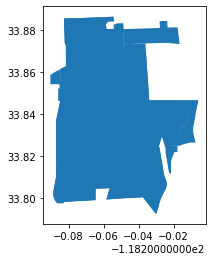

In [53]:
carson_income.plot()

In [54]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [55]:
list(carson_income)

['geoid',
 'name',
 'B19001001',
 'B19001001, Error',
 'B19001002',
 'B19001002, Error',
 'B19001003',
 'B19001003, Error',
 'B19001004',
 'B19001004, Error',
 'B19001005',
 'B19001005, Error',
 'B19001006',
 'B19001006, Error',
 'B19001007',
 'B19001007, Error',
 'B19001008',
 'B19001008, Error',
 'B19001009',
 'B19001009, Error',
 'B19001010',
 'B19001010, Error',
 'B19001011',
 'B19001011, Error',
 'B19001012',
 'B19001012, Error',
 'B19001013',
 'B19001013, Error',
 'B19001014',
 'B19001014, Error',
 'B19001015',
 'B19001015, Error',
 'B19001016',
 'B19001016, Error',
 'B19001017',
 'B19001017, Error',
 'geometry']

In [56]:
columns_to_keep=['geoid',
 'name',
 'B19001001',
 'B19001002',
 'B19001003',
 'B19001004',
 'B19001005',
 'B19001006',
 'B19001007',
 'B19001008',
 'B19001009',
 'B19001010',
 'B19001011',
 'B19001012',
 'B19001013',
 'B19001014',
 'B19001015',
 'B19001016',
 'B19001017',
 'geometry']

In [57]:
carson_income = carson_income[columns_to_keep]

In [58]:
carson_income.head()

,geoid,name,B19001001,B19001002,B19001003,B19001004,B19001005,B19001006,B19001007,B19001008,B19001009,B19001010,B19001011,B19001012,B19001013,B19001014,B19001015,B19001016,B19001017,geometry
0,15000US060375410021,"Block Group 1, Los Angeles, CA",982.0,58.0,25.0,0.0,86.0,17.0,0.0,29.0,65.0,46.0,116.0,113.0,134.0,151.0,47.0,80.0,15.0,"MULTIPOLYGON (((-118.28273 33.88547, -118.2826..."
1,15000US060375431005,"Block Group 5, Los Angeles, CA",175.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,11.0,0.0,20.0,17.0,53.0,40.0,0.0,9.0,0.0,"MULTIPOLYGON (((-118.26600 33.87342, -118.2659..."
2,15000US060375431006,"Block Group 6, Los Angeles, CA",284.0,8.0,45.0,30.0,0.0,12.0,16.0,0.0,10.0,0.0,7.0,23.0,14.0,37.0,56.0,0.0,26.0,"MULTIPOLYGON (((-118.26523 33.88598, -118.2637..."
3,15000US060375432024,"Block Group 4, Los Angeles, CA",254.0,0.0,0.0,32.0,30.0,33.0,0.0,15.0,0.0,15.0,51.0,7.0,20.0,16.0,0.0,23.0,12.0,"MULTIPOLYGON (((-118.24866 33.88042, -118.2482..."
4,15000US060375433041,"Block Group 1, Los Angeles, CA",353.0,9.0,0.0,29.0,0.0,0.0,0.0,0.0,24.0,7.0,11.0,57.0,52.0,32.0,4.0,75.0,53.0,"MULTIPOLYGON (((-118.24459 33.85660, -118.2437..."


In [59]:
list(carson_income)

['geoid',
 'name',
 'B19001001',
 'B19001002',
 'B19001003',
 'B19001004',
 'B19001005',
 'B19001006',
 'B19001007',
 'B19001008',
 'B19001009',
 'B19001010',
 'B19001011',
 'B19001012',
 'B19001013',
 'B19001014',
 'B19001015',
 'B19001016',
 'B19001017',
 'geometry']

In [60]:
carson_income.columns = ['geoid',
 'name',
 'Total',
 'Less than $10,000',
 '$10,000 to $14,999',
 '$15,000 to $19,999',
 '$20,000 to $24,999',
 '$25,000 to $29,999',
 '$30,000 to $34,999',
 '$35,000 to $39,999',
 '$40,000 to $44,999',
 '$45,000 to $49,999',
 '$50,000 to $59,999',
 '$60,000 to $74,999',
 '$75,000 to $99,999',
 '$100,000 to $124,999',
 '$125,000 to $149,999',
 '$150,000 to $199,999',
 '$200,000 or more',
 'geometry']

In [61]:
carson_income.head()

,geoid,name,Total,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",geometry
0,15000US060375410021,"Block Group 1, Los Angeles, CA",982.0,58.0,25.0,0.0,86.0,17.0,0.0,29.0,65.0,46.0,116.0,113.0,134.0,151.0,47.0,80.0,15.0,"MULTIPOLYGON (((-118.28273 33.88547, -118.2826..."
1,15000US060375431005,"Block Group 5, Los Angeles, CA",175.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,11.0,0.0,20.0,17.0,53.0,40.0,0.0,9.0,0.0,"MULTIPOLYGON (((-118.26600 33.87342, -118.2659..."
2,15000US060375431006,"Block Group 6, Los Angeles, CA",284.0,8.0,45.0,30.0,0.0,12.0,16.0,0.0,10.0,0.0,7.0,23.0,14.0,37.0,56.0,0.0,26.0,"MULTIPOLYGON (((-118.26523 33.88598, -118.2637..."
3,15000US060375432024,"Block Group 4, Los Angeles, CA",254.0,0.0,0.0,32.0,30.0,33.0,0.0,15.0,0.0,15.0,51.0,7.0,20.0,16.0,0.0,23.0,12.0,"MULTIPOLYGON (((-118.24866 33.88042, -118.2482..."
4,15000US060375433041,"Block Group 1, Los Angeles, CA",353.0,9.0,0.0,29.0,0.0,0.0,0.0,0.0,24.0,7.0,11.0,57.0,52.0,32.0,4.0,75.0,53.0,"MULTIPOLYGON (((-118.24459 33.85660, -118.2437..."


In [62]:
carson_income.tail()

,geoid,name,Total,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",geometry
55,15000US060375440023,"Block Group 3, Los Angeles, CA",296.0,5.0,5.0,20.0,5.0,0.0,26.0,7.0,7.0,0.0,0.0,24.0,56.0,44.0,9.0,35.0,53.0,"MULTIPOLYGON (((-118.22588 33.82930, -118.2258..."
56,15000US060375723012,"Block Group 2, Los Angeles, CA",410.0,0.0,12.0,29.0,10.0,32.0,16.0,31.0,11.0,0.0,51.0,16.0,90.0,29.0,51.0,0.0,32.0,"MULTIPOLYGON (((-118.22509 33.82548, -118.2237..."
57,15000US060379800021,"Block Group 1, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.25753 33.80197, -118.2571..."
58,15000US060379800251,"Block Group 1, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.25712 33.83927, -118.2571..."
59,16000US0611530,"Carson, CA",25211.0,756.0,958.0,663.0,679.0,718.0,789.0,711.0,913.0,699.0,1863.0,2416.0,3881.0,3048.0,2319.0,2549.0,2249.0,"MULTIPOLYGON (((-118.28888 33.80246, -118.2888..."


In [63]:
carson_income[carson_income['Total']==0]

,geoid,name,Total,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",geometry
57,15000US060379800021,"Block Group 1, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.25753 33.80197, -118.2571..."
58,15000US060379800251,"Block Group 1, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.25712 33.83927, -118.2571..."


In [64]:
carson_income = carson_income.drop([57,58,59])

In [65]:
carson_income.tail()

,geoid,name,Total,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",geometry
52,15000US060375440014,"Block Group 4, Los Angeles, CA",425.0,0.0,11.0,23.0,18.0,16.0,23.0,72.0,78.0,18.0,0.0,9.0,39.0,55.0,40.0,10.0,13.0,"MULTIPOLYGON (((-118.22463 33.83474, -118.2243..."
53,15000US060375440021,"Block Group 1, Los Angeles, CA",175.0,9.0,11.0,0.0,5.0,5.0,4.0,7.0,0.0,14.0,0.0,29.0,33.0,20.0,18.0,11.0,9.0,"MULTIPOLYGON (((-118.22662 33.82955, -118.2263..."
54,15000US060375440022,"Block Group 2, Los Angeles, CA",337.0,9.0,35.0,0.0,5.0,8.0,2.0,0.0,16.0,14.0,68.0,27.0,95.0,8.0,16.0,28.0,6.0,"MULTIPOLYGON (((-118.22604 33.83122, -118.2258..."
55,15000US060375440023,"Block Group 3, Los Angeles, CA",296.0,5.0,5.0,20.0,5.0,0.0,26.0,7.0,7.0,0.0,0.0,24.0,56.0,44.0,9.0,35.0,53.0,"MULTIPOLYGON (((-118.22588 33.82930, -118.2258..."
56,15000US060375723012,"Block Group 2, Los Angeles, CA",410.0,0.0,12.0,29.0,10.0,32.0,16.0,31.0,11.0,0.0,51.0,16.0,90.0,29.0,51.0,0.0,32.0,"MULTIPOLYGON (((-118.22509 33.82548, -118.2237..."


<AxesSubplot:ylabel='Frequency'>

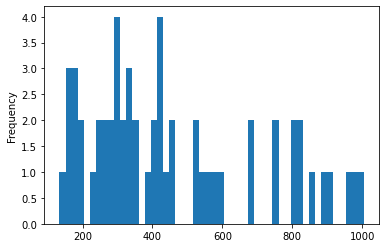

In [66]:
carson_income['Total'].plot.hist(bins=50)

In [67]:
carson_income = carson_income.sort_values(by='Total',ascending = False)

In [68]:
carson_income[['geoid','Total']].head(10)

,geoid,Total
12,15000US060375433211,1004.0
0,15000US060375410021,982.0
26,15000US060375436011,966.0
36,15000US060375437031,907.0
37,15000US060375438011,885.0
11,15000US060375433064,849.0
13,15000US060375433212,827.0
27,15000US060375436041,823.0
16,15000US060375433223,811.0
43,15000US060375438024,802.0


In [69]:
carson_income.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 57 entries, 12 to 46
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   geoid                 57 non-null     object  
 1   name                  57 non-null     object  
 2   Total                 57 non-null     float64 
 3   Less than $10,000     57 non-null     float64 
 4   $10,000 to $14,999    57 non-null     float64 
 5   $15,000 to $19,999    57 non-null     float64 
 6   $20,000 to $24,999    57 non-null     float64 
 7   $25,000 to $29,999    57 non-null     float64 
 8   $30,000 to $34,999    57 non-null     float64 
 9   $35,000 to $39,999    57 non-null     float64 
 10  $40,000 to $44,999    57 non-null     float64 
 11  $45,000 to $49,999    57 non-null     float64 
 12  $50,000 to $59,999    57 non-null     float64 
 13  $60,000 to $74,999    57 non-null     float64 
 14  $75,000 to $99,999    57 non-null     float64 
 15 

<AxesSubplot:>

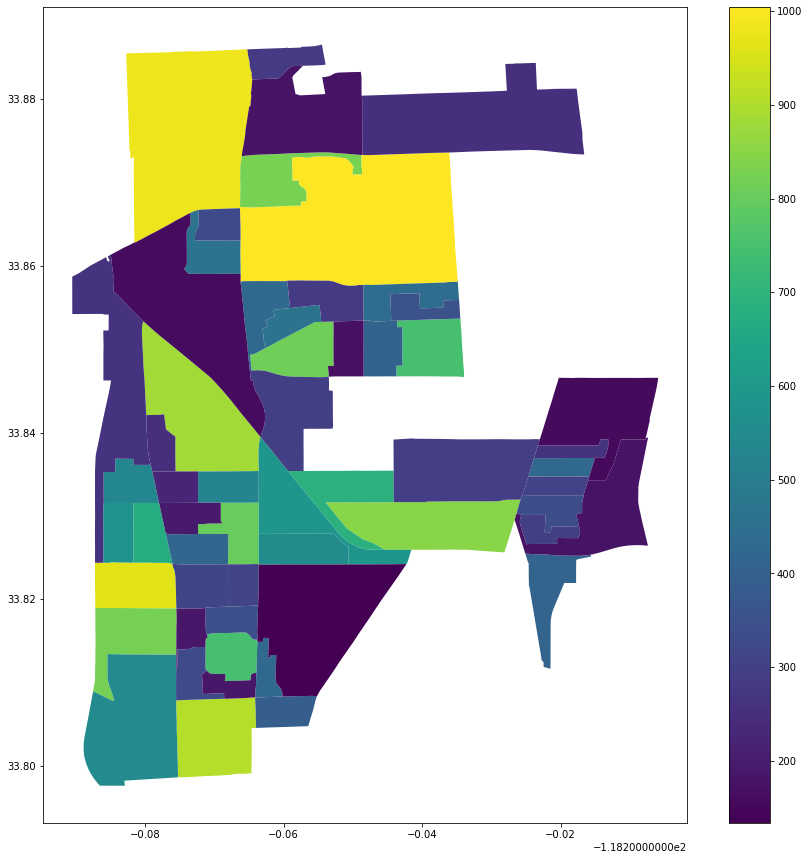

In [70]:
carson_income.head(100).plot(figsize=(15,15),column='Total',legend=True)

In [71]:
# output columns
list(carson_income)

['geoid',
 'name',
 'Total',
 'Less than $10,000',
 '$10,000 to $14,999',
 '$15,000 to $19,999',
 '$20,000 to $24,999',
 '$25,000 to $29,999',
 '$30,000 to $34,999',
 '$35,000 to $39,999',
 '$40,000 to $44,999',
 '$45,000 to $49,999',
 '$50,000 to $59,999',
 '$60,000 to $74,999',
 '$75,000 to $99,999',
 '$100,000 to $124,999',
 '$125,000 to $149,999',
 '$150,000 to $199,999',
 '$200,000 or more',
 'geometry']

In [72]:
carson_income['Percent Less than $10,000'] = carson_income['Less than $10,000']/carson_income['Total']*100
carson_income['Percent $10,000 to $14,999'] = carson_income['$10,000 to $14,999']/carson_income['Total']*100
carson_income['Percent $15,000 to $19,999'] = carson_income['$15,000 to $19,999']/carson_income['Total']*100
carson_income['Percent $20,000 to $24,999'] = carson_income['$20,000 to $24,999']/carson_income['Total']*100
carson_income['Percent $30,000 to $34,999'] = carson_income['$30,000 to $34,999']/carson_income['Total']*100
carson_income['Percent $35,000 to $39,999'] = carson_income['$35,000 to $39,999']/carson_income['Total']*100
carson_income['Percent $40,000 to $44,999'] = carson_income['$40,000 to $44,999']/carson_income['Total']*100
carson_income['Percent $45,000 to $49,999'] = carson_income['$45,000 to $49,999']/carson_income['Total']*100
carson_income['Percent $50,000 to $59,999'] = carson_income['$50,000 to $59,999']/carson_income['Total']*100
carson_income['Percent $60,000 to $74,999'] = carson_income['$60,000 to $74,999']/carson_income['Total']*100
carson_income['Percent $75,000 to $99,999'] = carson_income['$75,000 to $99,999']/carson_income['Total']*100
carson_income['Percent $100,000 to $124,999'] = carson_income['$100,000 to $124,999']/carson_income['Total']*100
carson_income['Percent $125,000 to $149,999'] = carson_income['$125,000 to $149,999']/carson_income['Total']*100
carson_income['Percent $150,000 to $199,999'] = carson_income['$150,000 to $199,999']/carson_income['Total']*100
carson_income['Percent $200,000 or more'] = carson_income['$200,000 or more']/carson_income['Total']*100

In [73]:
carson_income.head()

,geoid,name,Total,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",geometry,"Percent Less than $10,000","Percent $10,000 to $14,999","Percent $15,000 to $19,999","Percent $20,000 to $24,999","Percent $30,000 to $34,999","Percent $35,000 to $39,999","Percent $40,000 to $44,999","Percent $45,000 to $49,999","Percent $50,000 to $59,999","Percent $60,000 to $74,999","Percent $75,000 to $99,999","Percent $100,000 to $124,999","Percent $125,000 to $149,999","Percent $150,000 to $199,999","Percent $200,000 or more"
12,15000US060375433211,"Block Group 1, Los Angeles, CA",1004.0,41.0,0.0,19.0,42.0,32.0,19.0,0.0,12.0,9.0,68.0,108.0,82.0,112.0,221.0,106.0,133.0,"MULTIPOLYGON (((-118.26630 33.86691, -118.2663...",4.083665,0.000000,1.892430,4.183267,1.892430,0.000000,1.195219,0.896414,6.772908,10.756972,8.167331,11.155378,22.011952,10.557769,13.247012
0,15000US060375410021,"Block Group 1, Los Angeles, CA",982.0,58.0,25.0,0.0,86.0,17.0,0.0,29.0,65.0,46.0,116.0,113.0,134.0,151.0,47.0,80.0,15.0,"MULTIPOLYGON (((-118.28273 33.88547, -118.2826...",5.906314,2.545825,0.000000,8.757637,0.000000,2.953157,6.619145,4.684318,11.812627,11.507128,13.645621,15.376782,4.786151,8.146640,1.527495
26,15000US060375436011,"Block Group 1, Los Angeles, CA",966.0,0.0,24.0,53.0,59.0,45.0,9.0,24.0,38.0,15.0,63.0,92.0,190.0,147.0,23.0,65.0,119.0,"MULTIPOLYGON (((-118.28724 33.82382, -118.2872...",0.000000,2.484472,5.486542,6.107660,0.931677,2.484472,3.933747,1.552795,6.521739,9.523810,19.668737,15.217391,2.380952,6.728778,12.318841
36,15000US060375437031,"Block Group 1, Los Angeles, CA",907.0,32.0,0.0,0.0,20.0,31.0,7.0,43.0,57.0,42.0,56.0,81.0,73.0,111.0,117.0,109.0,128.0,"MULTIPOLYGON (((-118.27552 33.80786, -118.2743...",3.528115,0.000000,0.000000,2.205072,0.771775,4.740904,6.284454,4.630650,6.174201,8.930540,8.048512,12.238148,12.899669,12.017641,14.112459
37,15000US060375438011,"Block Group 1, Los Angeles, CA",885.0,44.0,80.0,33.0,35.0,16.0,62.0,41.0,39.0,33.0,31.0,55.0,135.0,92.0,74.0,107.0,8.0,"MULTIPOLYGON (((-118.28046 33.85224, -118.2804...",4.971751,9.039548,3.728814,3.954802,7.005650,4.632768,4.406780,3.728814,3.502825,6.214689,15.254237,10.395480,8.361582,12.090395,0.903955


In [74]:
carson_income['Percent Less than $35,000'] = carson_income['Percent Less than $10,000']+carson_income['Percent $10,000 to $14,999']+carson_income['Percent $15,000 to $19,999']+carson_income['Percent $20,000 to $24,999']+carson_income['Percent $30,000 to $34,999']
carson_income['Percent Between $35,000 to $59,999'] = carson_income['Percent $35,000 to $39,999']+carson_income['Percent $40,000 to $44,999']+carson_income['Percent $45,000 to $49,999']+carson_income['Percent $50,000 to $59,999']
carson_income['Percent Between $60,000 to $74,999']= carson_income['Percent $60,000 to $74,999']
carson_income['Percent Above $75,000'] = carson_income['Percent $75,000 to $99,999']+carson_income['Percent $100,000 to $124,999']+carson_income['Percent $125,000 to $149,999']+carson_income['Percent $150,000 to $199,999']+carson_income['Percent $200,000 or more']


In [75]:
carson_income.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 57 entries, 12 to 46
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   geoid                               57 non-null     object  
 1   name                                57 non-null     object  
 2   Total                               57 non-null     float64 
 3   Less than $10,000                   57 non-null     float64 
 4   $10,000 to $14,999                  57 non-null     float64 
 5   $15,000 to $19,999                  57 non-null     float64 
 6   $20,000 to $24,999                  57 non-null     float64 
 7   $25,000 to $29,999                  57 non-null     float64 
 8   $30,000 to $34,999                  57 non-null     float64 
 9   $35,000 to $39,999                  57 non-null     float64 
 10  $40,000 to $44,999                  57 non-null     float64 
 11  $45,000 to $49,999       

<AxesSubplot:>

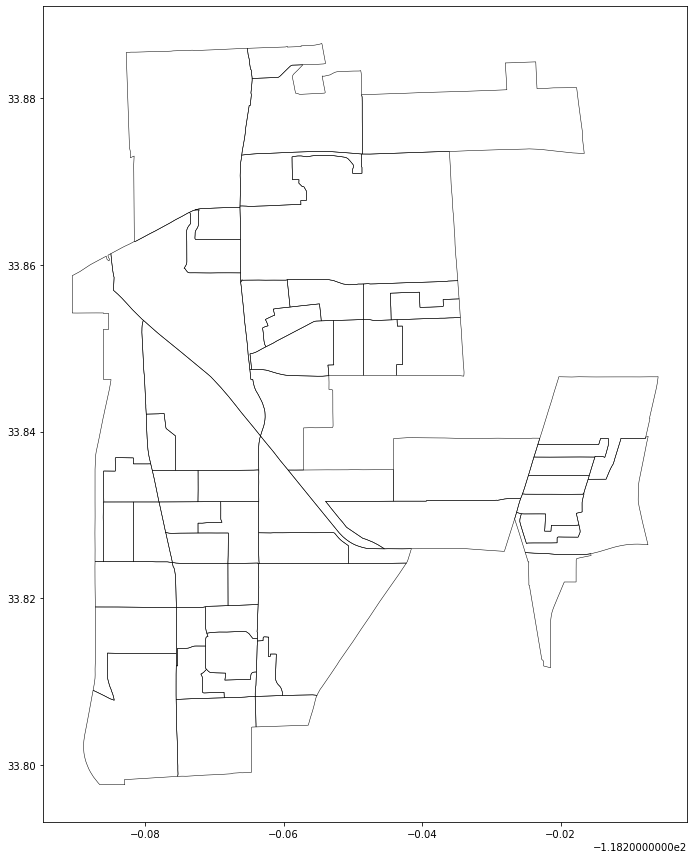

In [76]:
fig,ax = plt.subplots(figsize=(15,15))

# while lines to show block groups (sandwiched between the two layers above for visual clarity)
carson_income.boundary.plot(ax=ax,color='black',zorder=15,lw=0.5)

<AxesSubplot:>

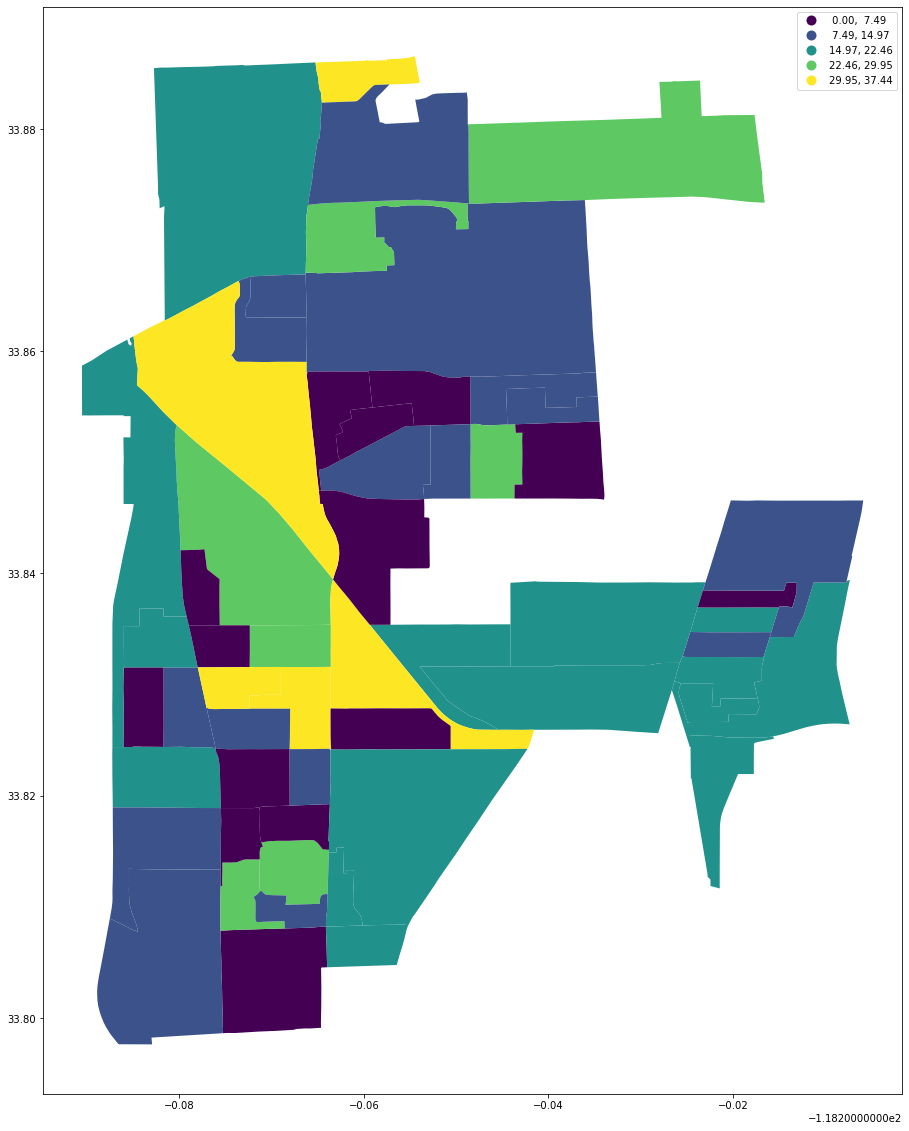

In [77]:
carson_income.plot(figsize=(20,20),
         column='Percent Less than $35,000',
         legend=True,
         scheme='equal_interval')

In [78]:
carson_income.head()

,geoid,name,Total,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",geometry,"Percent Less than $10,000","Percent $10,000 to $14,999","Percent $15,000 to $19,999","Percent $20,000 to $24,999","Percent $30,000 to $34,999","Percent $35,000 to $39,999","Percent $40,000 to $44,999","Percent $45,000 to $49,999","Percent $50,000 to $59,999","Percent $60,000 to $74,999","Percent $75,000 to $99,999","Percent $100,000 to $124,999","Percent $125,000 to $149,999","Percent $150,000 to $199,999","Percent $200,000 or more","Percent Less than $35,000","Percent Between $35,000 to $59,999","Percent Between $60,000 to $74,999","Percent Above $75,000"
12,15000US060375433211,"Block Group 1, Los Angeles, CA",1004.0,41.0,0.0,19.0,42.0,32.0,19.0,0.0,12.0,9.0,68.0,108.0,82.0,112.0,221.0,106.0,133.0,"MULTIPOLYGON (((-118.26630 33.86691, -118.2663...",4.083665,0.000000,1.892430,4.183267,1.892430,0.000000,1.195219,0.896414,6.772908,10.756972,8.167331,11.155378,22.011952,10.557769,13.247012,12.051793,8.864542,10.756972,65.139442
0,15000US060375410021,"Block Group 1, Los Angeles, CA",982.0,58.0,25.0,0.0,86.0,17.0,0.0,29.0,65.0,46.0,116.0,113.0,134.0,151.0,47.0,80.0,15.0,"MULTIPOLYGON (((-118.28273 33.88547, -118.2826...",5.906314,2.545825,0.000000,8.757637,0.000000,2.953157,6.619145,4.684318,11.812627,11.507128,13.645621,15.376782,4.786151,8.146640,1.527495,17.209776,26.069246,11.507128,43.482688
26,15000US060375436011,"Block Group 1, Los Angeles, CA",966.0,0.0,24.0,53.0,59.0,45.0,9.0,24.0,38.0,15.0,63.0,92.0,190.0,147.0,23.0,65.0,119.0,"MULTIPOLYGON (((-118.28724 33.82382, -118.2872...",0.000000,2.484472,5.486542,6.107660,0.931677,2.484472,3.933747,1.552795,6.521739,9.523810,19.668737,15.217391,2.380952,6.728778,12.318841,15.010352,14.492754,9.523810,56.314700
36,15000US060375437031,"Block Group 1, Los Angeles, CA",907.0,32.0,0.0,0.0,20.0,31.0,7.0,43.0,57.0,42.0,56.0,81.0,73.0,111.0,117.0,109.0,128.0,"MULTIPOLYGON (((-118.27552 33.80786, -118.2743...",3.528115,0.000000,0.000000,2.205072,0.771775,4.740904,6.284454,4.630650,6.174201,8.930540,8.048512,12.238148,12.899669,12.017641,14.112459,6.504961,21.830209,8.930540,59.316428
37,15000US060375438011,"Block Group 1, Los Angeles, CA",885.0,44.0,80.0,33.0,35.0,16.0,62.0,41.0,39.0,33.0,31.0,55.0,135.0,92.0,74.0,107.0,8.0,"MULTIPOLYGON (((-118.28046 33.85224, -118.2804...",4.971751,9.039548,3.728814,3.954802,7.005650,4.632768,4.406780,3.728814,3.502825,6.214689,15.254237,10.395480,8.361582,12.090395,0.903955,28.700565,16.271186,6.214689,47.005650


In [79]:
carson_income['Total'].median()

404.0

In [80]:
carson_income.tail()

,geoid,name,Total,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",geometry,"Percent Less than $10,000","Percent $10,000 to $14,999","Percent $15,000 to $19,999","Percent $20,000 to $24,999","Percent $30,000 to $34,999","Percent $35,000 to $39,999","Percent $40,000 to $44,999","Percent $45,000 to $49,999","Percent $50,000 to $59,999","Percent $60,000 to $74,999","Percent $75,000 to $99,999","Percent $100,000 to $124,999","Percent $125,000 to $149,999","Percent $150,000 to $199,999","Percent $200,000 or more","Percent Less than $35,000","Percent Between $35,000 to $59,999","Percent Between $60,000 to $74,999","Percent Above $75,000"
1,15000US060375431005,"Block Group 5, Los Angeles, CA",175.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,11.0,0.0,20.0,17.0,53.0,40.0,0.0,9.0,0.0,"MULTIPOLYGON (((-118.26600 33.87342, -118.2659...",4.571429,0.0,0.000000,5.142857,0.000000,0.0,6.285714,0.00000,11.428571,9.714286,30.285714,22.857143,0.000000,5.142857,0.000000,9.714286,17.714286,9.714286,58.285714
17,15000US060375433224,"Block Group 4, Los Angeles, CA",168.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,48.0,14.0,20.0,23.0,21.0,"MULTIPOLYGON (((-118.25360 33.84798, -118.2527...",0.000000,0.0,13.690476,0.000000,0.000000,0.0,0.000000,0.00000,11.309524,0.000000,28.571429,8.333333,11.904762,13.690476,12.500000,13.690476,11.309524,0.000000,75.000000
21,15000US060375434003,"Block Group 3, Los Angeles, CA",161.0,31.0,0.0,10.0,5.0,0.0,5.0,0.0,0.0,10.0,0.0,12.0,19.0,8.0,21.0,29.0,11.0,"MULTIPOLYGON (((-118.28494 33.86134, -118.2849...",19.254658,0.0,6.211180,3.105590,3.105590,0.0,0.000000,6.21118,0.000000,7.453416,11.801242,4.968944,13.043478,18.012422,6.832298,31.677019,6.211180,7.453416,54.658385
49,15000US060375440011,"Block Group 1, Los Angeles, CA",155.0,0.0,0.0,14.0,0.0,17.0,6.0,0.0,0.0,0.0,0.0,32.0,22.0,16.0,0.0,48.0,0.0,"MULTIPOLYGON (((-118.22299 33.83919, -118.2225...",0.000000,0.0,9.032258,0.000000,3.870968,0.0,0.000000,0.00000,0.000000,20.645161,14.193548,10.322581,0.000000,30.967742,0.000000,12.903226,0.000000,20.645161,55.483871
46,15000US060375439051,"Block Group 1, Los Angeles, CA",134.0,16.0,0.0,0.0,0.0,10.0,14.0,0.0,14.0,0.0,21.0,12.0,14.0,24.0,0.0,9.0,0.0,"MULTIPOLYGON (((-118.26381 33.81625, -118.2637...",11.940299,0.0,0.000000,0.000000,10.447761,0.0,10.447761,0.00000,15.671642,8.955224,10.447761,17.910448,0.000000,6.716418,0.000000,22.388060,26.119403,8.955224,35.074627


Text(0.5, 1.0, 'Percent Between 35,000 to 59,999')

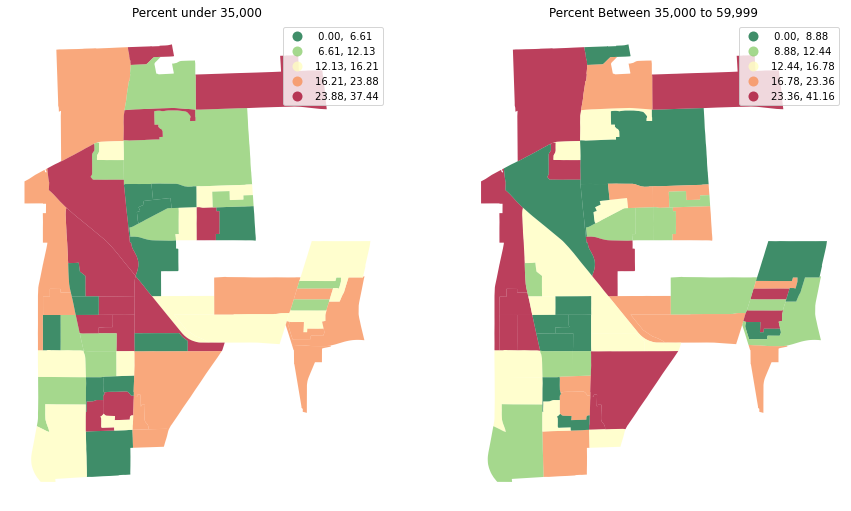

In [83]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

ax1, ax2 = axs

carson_income.plot(column='Percent Less than $35,000', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, 
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent under 35,000")

carson_income.plot(column='Percent Between $35,000 to $59,999', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, 
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Between 35,000 to 59,999")

Text(0.5, 1.0, 'Percent Between 60,000 to 74,999')

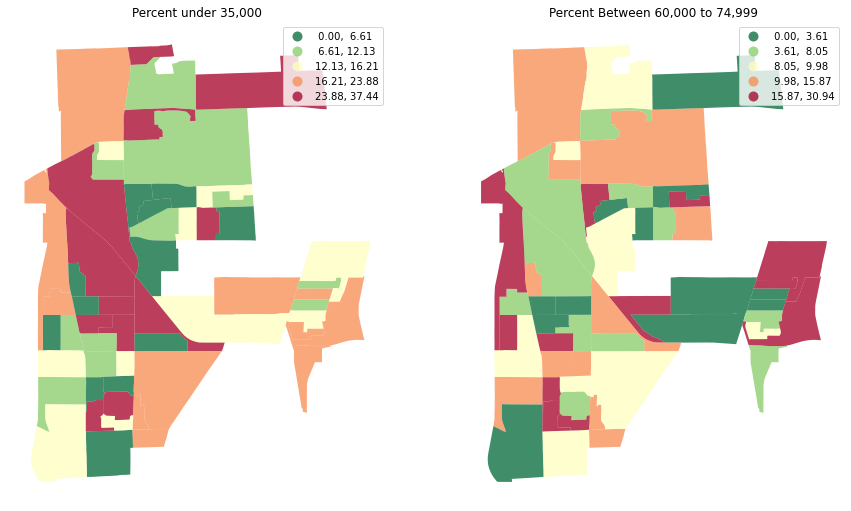

In [84]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

ax1, ax2 = axs

carson_income.plot(column='Percent Less than $35,000', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, 
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent under 35,000")

carson_income.plot(column='Percent Between $60,000 to $74,999', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, 
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Between 60,000 to 74,999")

In [85]:
# reproject to web mercator
carson_income = carson_income.to_crs(epsg=3857)

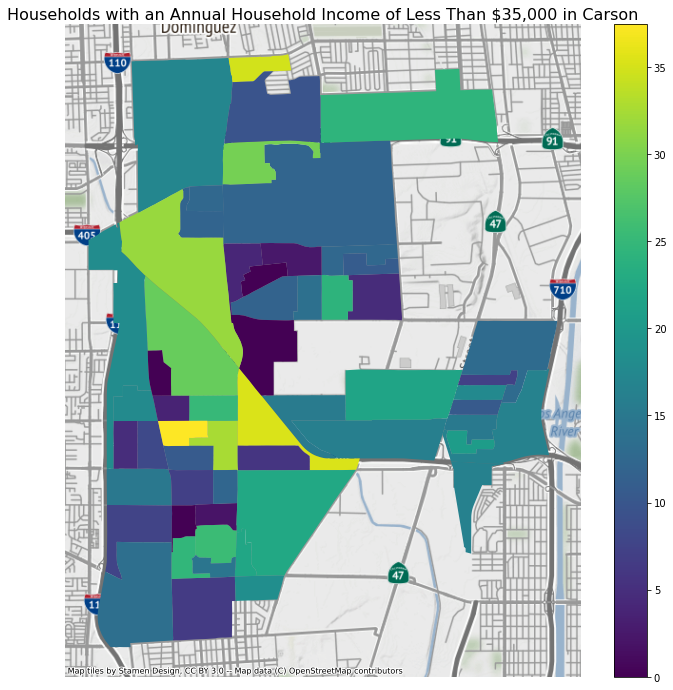

In [87]:
fig, ax = plt.subplots(figsize=(12,12))

carson_income.plot(ax=ax,
                      figsize=(20,40),
                      column='Percent Less than $35,000',
                      legend=True)

ax.axis('off')

ax.set_title('Households with an Annual Household Income of Less Than $35,000 in Carson',fontsize=16)

ctx.add_basemap(ax)

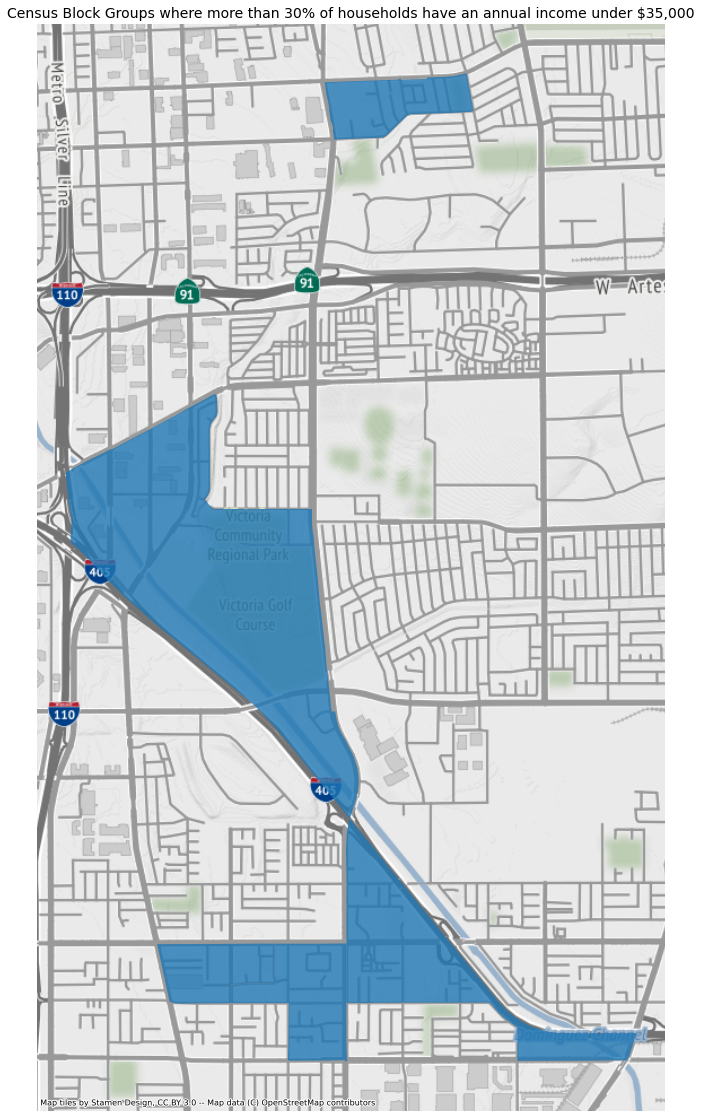

In [92]:
fig, ax = plt.subplots(figsize=(20, 20))

carson_income[carson_income['Percent Less than $35,000'] > 30].plot(ax=ax, alpha=0.8)

ax.axis('off')

ax.set_title('Census Block Groups where more than 30% of households have an annual income under $35,000',fontsize=14)

ctx.add_basemap(ax)